# Plots the DFT ground state energy of the combined hBN-water system as a function of plane wave energy cutoff.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_df(data_path):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    return df


def plot_basis_set_extrapolation(df):
    system = df["system"].values[0]
    functional = df["functional"].values[0]
    ecp = df["ecp"].values[0]
    Nk = df["Nk"].values[0]
    Ns = df["Ns"].values[0]
    plt.figure(figsize=(5, 5))
    plt.title(
        f"Basis set extrapolation for hBN-water system"
        + f"\n {functional}, {ecp}, {Nk}x{Nk}x1 k-mesh, {Ns}x{Ns}x1 supercell"
    )
    plt.xlabel(r"Plane wave E$_{cut}$ (eV)")
    plt.ylabel("DFT total energy (eV)")
    plt.plot(
        "ecut_ev",
        "total_energy_ev",
        data=df,
        linestyle="solid",
        marker="o",
    )
    plt.savefig(
        f"/Users/Nathan/Desktop/basis_set_extrapolation_{system}_{functional}_{ecp}_Nk_{Nk}_Ns_{Ns}.png",
        dpi=300,
        bbox_inches="tight",
    )

In [7]:
data_path = "total_energy_data.txt"
ryd_per_ev = 0.0734986176
df = make_df(data_path)
df["total_energy_ev"] = (df["total_energy_ryd"].values - df["total_energy_ryd"].values[-1]) / ryd_per_ev
df

,system,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev
0,hBN_water_Oup_Hdown,pbe,paw,400,1,1,-203.002708,3.571972
1,hBN_water_Oup_Hdown,pbe,paw,500,1,1,-203.237756,0.373986
2,hBN_water_Oup_Hdown,pbe,paw,600,1,1,-203.263624,0.022032
3,hBN_water_Oup_Hdown,pbe,paw,700,1,1,-203.264343,0.012244
4,hBN_water_Oup_Hdown,pbe,paw,800,1,1,-203.265243,0.000000


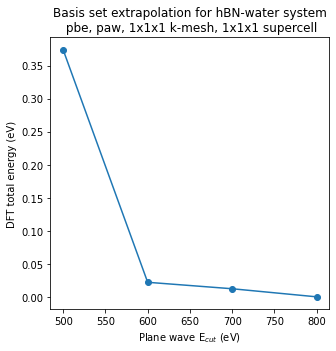

In [8]:
plot_basis_set_extrapolation(df[df.total_energy_ev < 3])